## **What is ROC curve?**

The **ROC curve** summarizes the prediction performance of a classification model at all classification thresholds. Particularly, the ROC curve plots the **False Positive Rate (FPR)** on the *X-axis* and the **True Positive Rate (TPR)** on the *Y-axis*.

$\text{TPR (Sensitivity)} = \frac{TP}{TP + FN}$

$\text{FPR (1 - Specificity)} = \frac{FP}{TN + FP}$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

## Generate synthetic dataset

In [2]:
X, y = make_classification(n_samples=2000, n_classes=2, n_features=10, random_state=0)

In [3]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape

X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)
(X_train, X_test, y_train, y_test) = train_test_split(
    X, y, test_size=0.5, stratify=y, random_state=0
)

## Build classification models

### Random Forest

In [4]:
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=5, n_estimators=500)

### Naive Bayes

In [5]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

### Logistic Regression

In [6]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Prediction probabilities

In [7]:
r_probs = [0 for _ in range(len(y_test))]
# r_probs = [np.random.randint(2, size=1)[0] for _ in range(len(y_test))]
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)
lr_probs = lr.predict_proba(X_test)

we only care about the positive outcome

In [8]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
lr_probs = lr_probs[:, 1]

### Calculate AUROC

In [9]:
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [10]:
f"{r_auc=}, {rf_auc=}, {nb_auc=}, {lr_auc=}"

'r_auc=0.5, rf_auc=0.8782255129020515, nb_auc=0.9901239604958421, lr_auc=0.9109956439825759'

### Calculate ROC

In [11]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

## Plot the ROC curve

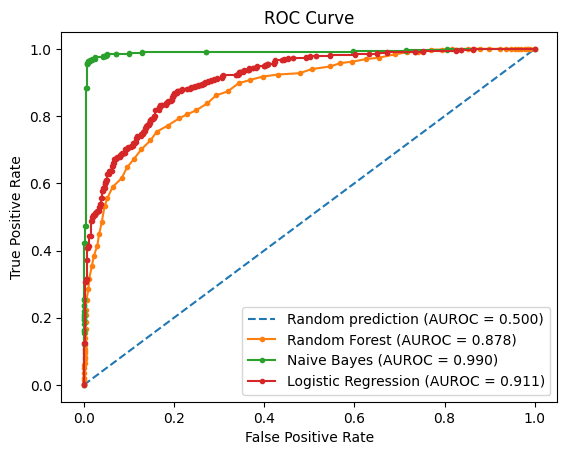

In [12]:
plt.plot(
    r_fpr, r_tpr, linestyle="--", label="Random prediction (AUROC = %0.3f)" % r_auc
)
plt.plot(rf_fpr, rf_tpr, marker=".", label="Random Forest (AUROC = %0.3f)" % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker=".", label="Naive Bayes (AUROC = %0.3f)" % nb_auc)
plt.plot(
    lr_fpr, lr_tpr, marker=".", label="Logistic Regression (AUROC = %0.3f)" % lr_auc
)

plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()